In [1]:
%load_ext autoreload
%autoreload 2

In [44]:
import climetlab as cml
from climetlab_cems_flood.adapter import Adapter
import climetlab_cems_flood as cmf

In [45]:
nwse = [50.972204,5.450796, 46.296530, 11.871059] # Ryne

In [50]:

class MyMerger():
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    def merge(self, paths, **kwargs):
        return xr.open_mfdataset(paths)

In [53]:
forecast1 = cml.load_dataset(
            'cems-flood-glofas-forecast',
            model='lisflood',
            product_type='ensemble_perturbed_forecasts',
            system_version='operational',
            period= '20210710-20210715',#'2001-200401-04*',
            leadtime_hour = '24-120',
            variable="river_discharge_in_the_last_24_hours",
            #area= nwse,
            split_on = ['day'],
            threads = 6,
            merger = "merge"
        )

  0%|          | 0/6 [00:00<?, ?it/s]

In [54]:
forecast1.to_xarray()

<xarray.Dataset>
Dimensions:                  (realization: 50, forecast_reference_time: 6,
                              leadtime: 5, lat: 1500, lon: 3600)
Coordinates:
  * realization              (realization) int64 1 2 3 4 5 6 ... 46 47 48 49 50
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 2021-07...
  * leadtime                 (leadtime) timedelta64[ns] 1 days 2 days ... 5 days
  * lat                      (lat) float64 -59.95 -59.85 -59.75 ... 89.85 89.95
  * lon                      (lon) float64 -179.9 -179.8 -179.8 ... 179.8 179.9
    time                     (forecast_reference_time, leadtime) datetime64[ns] dask.array<chunksize=(1, 5), meta=np.ndarray>
Data variables:
    dis24                    (realization, forecast_reference_time, leadtime, lat, lon) float32 dask.array<chunksize=(50, 1, 5, 1500, 3600), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-04-02T08:36 GRIB to CDM+CF via cfgrib-0.9.1...

In [55]:
ada = Adapter(forecast1, 
              output_folder= '/home/iff/temp', 
              output_name_prefix= 'test')

In [ ]:
ada.to_zarr(True, 
            {"dis24":{"realization":10,
                      "forecast_reference_time": 1,
                      "leadtime": -1,
                      "lat": 100,
                      "lon": 100},
            "forecast_reference_time":None,
            "lat":None,
            "lon":None,
            "leadtime":None},
            '10M', 
            'temp.zarr')

2022-04-02 08:40:51,106 WARNING Ignoring index file '/home/iff/climet-cache/c-dsretriever-014f6a32e31dd06cb87cbcefc56ed05f51fdfb7c7bd77872ab9492c7ad4d3335.grib.923a8.idx' incompatible with GRIB file
2022-04-02 08:41:08,039 WARNING Ignoring index file '/home/iff/climet-cache/c-dsretriever-1c4b3357913521207e355a4175a17501501d8047848f87ab274f4e81a53bcc1f.grib.923a8.idx' incompatible with GRIB file


In [31]:
ada.to_netcdf()

2022-04-01 21:50:29,437 WARNING Ignoring index file '/home/iff/climet-cache/c-dsretriever-7188c07edd8a01b4ce85a3b59ee38c156213314050702642bd1171d8e8cfaa47.grib.923a8.idx' incompatible with GRIB file
2022-04-01 21:50:29,937 WARNING Ignoring index file '/home/iff/climet-cache/c-dsretriever-fee65c5790f0c94124b33083028b840183d8e99988c2075915bec31d6e110f74.grib.923a8.idx' incompatible with GRIB file
2022-04-01 21:50:30,427 WARNING Ignoring index file '/home/iff/climet-cache/c-dsretriever-4a95d63dfe37cbfddfd2ca6856bdefeb5471b4ddd36cbc4bd24790a672ba9a25.grib.923a8.idx' incompatible with GRIB file


In [33]:
24*5

120

In [6]:
import matplotlib.pyplot as plt

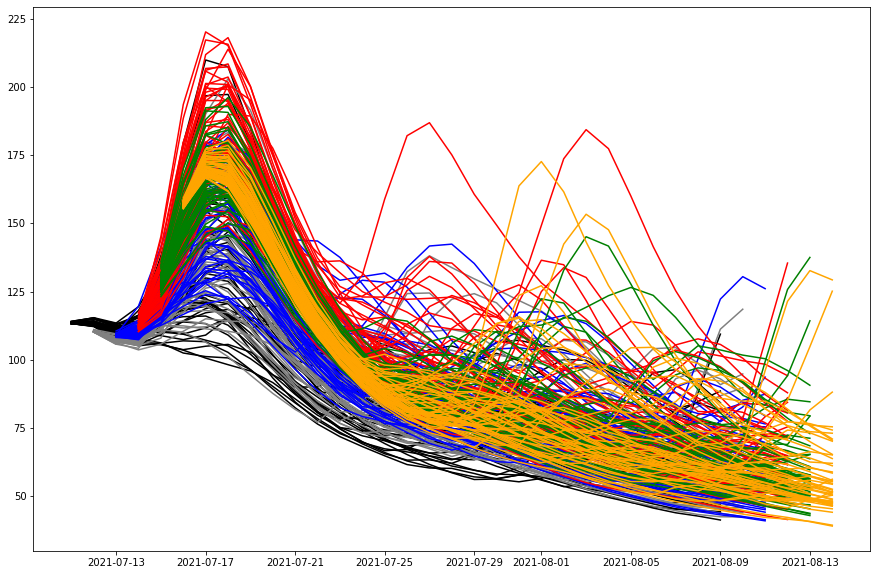

In [8]:
plt.figure(figsize=(15,10))
for i,c in enumerate(["black","grey","blue","red","green","orange"]):
    _ = plt.plot(ds.dis24.isel(forecast_reference_time=i).time.values,
                 ds.dis24.isel(forecast_reference_time=i,drop=True).mean(["lat","lon"]).values.T,
                 color=c)

In [ ]:
forecast = cml.load_dataset(
            'cems-flood-glofas-forecast',
            model='lisflood',
            product_type='ensemble_perturbed_forecasts',
            system_version='operational',
            period= '20210710-20210715',#'2001-200401-04*',
            leadtime_hour = '24-720',
            variable="river_discharge_in_the_last_24_hours",
            area= nwse, # list of ROI
            split_on = [('day',1)],
            threads = 5
            # output_folder = //
            # output_format = 'zarr'
            # output_name = "{dataset}_{year}_{month}_{day}_{area}"
            # merger
            # filter
        )

By downloading data from this dataset, you agree to the terms and conditions defined at https://github.com/ecmwf-lab/climetlab_cems_flood/LICENSEIf you do not agree with such terms, do not download the data. 


  0%|          | 0/6 [00:00<?, ?it/s]

2022-03-26 16:21:53,021 INFO Welcome to the CDS
2022-03-26 16:21:53,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-forecast
2022-03-26 16:21:53,099 INFO Welcome to the CDS
2022-03-26 16:21:53,101 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-forecast
2022-03-26 16:21:53,178 INFO Welcome to the CDS
2022-03-26 16:21:53,179 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-forecast
2022-03-26 16:21:53,263 INFO Welcome to the CDS
2022-03-26 16:21:53,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-forecast
2022-03-26 16:21:53,355 INFO Welcome to the CDS
2022-03-26 16:21:53,357 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-forecast
2022-03-26 16:21:55,593 INFO Request is queued
2022-03-26 16:21:55,739 INFO Request is queued
2022-03-26 16:21:55,797 INFO Request is queued
2022-03-26 16:21:55

In [8]:
from itertools import chain, product
from copy import deepcopy

In [93]:
req = { "year":["2000","2001","2002","2003","2004","2005"], "month":["01","02","03","04","05","06","07"],"var":["soil", "rain"]}

In [94]:
split = ["year","month", "var"]

In [97]:
[i for i in list(range(10))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [102]:
split = [("year",2),("month",3), "var"]
split_mod = [i if isinstance(i, tuple) else (i,None) for i in split]
split_mod

[('year', 2), ('month', 3), ('var', None)]

In [103]:
def chunked(out_list, chunk_size):
    if chunk_size is None:
        return out_list
    return [out_list[i:i+chunk_size] for i in range(0, len(out_list), chunk_size)]

In [104]:
[chunked(req[s[0]],s[1]) for s in split_mod]

[[['2000', '2001'], ['2002', '2003'], ['2004', '2005']],
 [['01', '02', '03'], ['04', '05', '06'], ['07']],
 ['soil', 'rain']]

In [105]:
list(product(*[chunked(req[s[0]],s[1]) for s in split_mod] ))

[(['2000', '2001'], ['01', '02', '03'], 'soil'),
 (['2000', '2001'], ['01', '02', '03'], 'rain'),
 (['2000', '2001'], ['04', '05', '06'], 'soil'),
 (['2000', '2001'], ['04', '05', '06'], 'rain'),
 (['2000', '2001'], ['07'], 'soil'),
 (['2000', '2001'], ['07'], 'rain'),
 (['2002', '2003'], ['01', '02', '03'], 'soil'),
 (['2002', '2003'], ['01', '02', '03'], 'rain'),
 (['2002', '2003'], ['04', '05', '06'], 'soil'),
 (['2002', '2003'], ['04', '05', '06'], 'rain'),
 (['2002', '2003'], ['07'], 'soil'),
 (['2002', '2003'], ['07'], 'rain'),
 (['2004', '2005'], ['01', '02', '03'], 'soil'),
 (['2004', '2005'], ['01', '02', '03'], 'rain'),
 (['2004', '2005'], ['04', '05', '06'], 'soil'),
 (['2004', '2005'], ['04', '05', '06'], 'rain'),
 (['2004', '2005'], ['07'], 'soil'),
 (['2004', '2005'], ['07'], 'rain')]

In [91]:
for n in list(product(*[chunked(req[s[0]],s[1]) for s in split_mod] )):
    d = { k[0]:v for k,v in zip(split_mod,n)}
    r = deepcopy(req)
    r.update(d)
    print(r)

{'year': '2000', 'month': ['01', '02'], 'var': 'soil'}
{'year': '2000', 'month': ['01', '02'], 'var': 'rain'}
{'year': '2000', 'month': ['03', '04'], 'var': 'soil'}
{'year': '2000', 'month': ['03', '04'], 'var': 'rain'}
{'year': '2000', 'month': ['05', '06'], 'var': 'soil'}
{'year': '2000', 'month': ['05', '06'], 'var': 'rain'}
{'year': '2000', 'month': ['07'], 'var': 'soil'}
{'year': '2000', 'month': ['07'], 'var': 'rain'}
{'year': '2001', 'month': ['01', '02'], 'var': 'soil'}
{'year': '2001', 'month': ['01', '02'], 'var': 'rain'}
{'year': '2001', 'month': ['03', '04'], 'var': 'soil'}
{'year': '2001', 'month': ['03', '04'], 'var': 'rain'}
{'year': '2001', 'month': ['05', '06'], 'var': 'soil'}
{'year': '2001', 'month': ['05', '06'], 'var': 'rain'}
{'year': '2001', 'month': ['07'], 'var': 'soil'}
{'year': '2001', 'month': ['07'], 'var': 'rain'}
{'year': '2002', 'month': ['01', '02'], 'var': 'soil'}
{'year': '2002', 'month': ['01', '02'], 'var': 'rain'}
{'year': '2002', 'month': ['03', '